In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [4]:
import datetime

In [59]:
##Importing data
train = pd.read_csv('train.csv', nrows = 100000).dropna()
train = train.sample(frac=0.01, random_state=99)
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
54146,2013-02-27 11:09:47,2,3,66,288,19207,4710.8124,192603,0,0,...,1,1,44035,6,0,3,6,204,0,3
73939,2014-04-14 18:36:32,2,3,66,442,28620,561.7767,296618,1,0,...,0,1,8258,1,0,1,2,50,645,6
41988,2014-12-25 22:02:39,2,3,66,462,11488,6275.7051,158305,0,0,...,0,1,8215,1,0,1,6,208,951,36
29834,2013-12-16 19:47:34,2,3,66,442,49165,3207.4434,121187,0,0,...,0,1,12308,5,1,1,2,50,649,80
67723,2014-04-17 18:53:37,34,3,205,354,41495,1954.8695,251184,0,0,...,2,1,12206,6,0,2,2,50,628,79


In [6]:
destinations = pd.read_csv('destinations.csv')
destinations.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [8]:
test = pd.read_csv('test.csv', nrows=100000)
test

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2015-07-15 05:16:04,2,3,66,442,28620,9167.6486,332747,0,...,2015-08-21,2015-08-23,2,1,1,21393,4,3,182,46
99996,99996,2015-09-08 00:31:42,2,3,66,442,41566,9433.7606,332747,0,...,2015-09-30,2015-10-01,1,0,1,9541,1,3,104,51
99997,99997,2015-09-15 02:20:39,2,3,0,275,49723,NaN,332747,0,...,2015-12-20,2015-12-24,3,0,2,12206,6,2,50,628
99998,99998,2015-09-22 21:36:29,2,3,66,442,28620,411.7322,332747,0,...,2015-09-24,2015-09-25,1,0,1,66,1,2,50,423


/Users/aarondrexler/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hotel_cluster', ylabel='Density'>

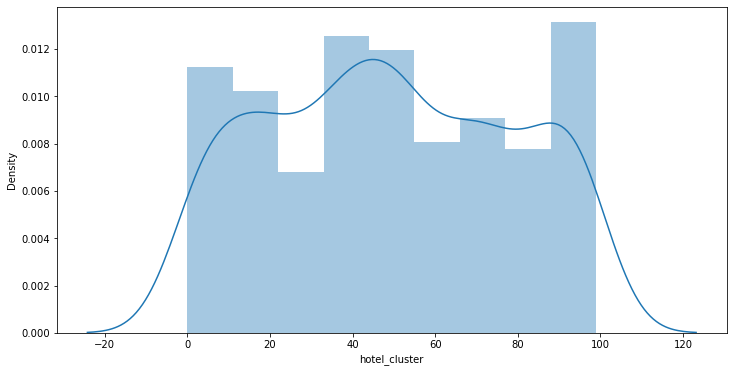

In [10]:
plt.figure(figsize=(12, 6))
sns.distplot(train['hotel_cluster'])
##Creating histogram of hotel clusters range

In [11]:
from datetime import datetime
def year(i):
    if i is not None and type(i) is not float:
        try:
            return datetime.strptime(i, '%Y-%m-%d').year
        except ValueError:
            return datetime.strptime(i, '%Y-%m-%d %H:%M:%S').year
    else:
        return 2013
    pass
##Gets year of the date

In [12]:
def month(i):
    if i is not None and type(i) is not float:
        try:
            return datetime.strptime(i, '%Y-%m-%d').month
        except:
            return datetime.strptime(i, '%Y-%m-%d %H:%M:%S').month
    else:
        return 1
    pass
##Gets month of the date

In [13]:
##Gets year and month from date time in train df
train['date_time_year'] = pd.Series(train.date_time, index = train.index)
train['date_time_month'] = pd.Series(train.date_time, index = train.index)

In [15]:
train.date_time_year = train.date_time_year.apply(lambda i: year(i))
train.date_time_month = train.date_time_month.apply(lambda i: month(i))
del train['date_time']

In [16]:
##Gets year and month from check in in train df
train['srch_ci_year'] = pd.Series(train.srch_ci, index = train.index)
train['srch_ci_month'] = pd.Series(train.srch_ci, index = train.index)

In [18]:
train.srch_ci_year = train.srch_ci_year.apply(lambda i: year(i))
train.srch_ci_month = train.srch_ci_month.apply(lambda i: month(i))
del train['srch_ci']

In [19]:
##Gets year and month from check out in train df
train['srch_co_year'] = pd.Series(train.srch_co, index = train.index)
train['srch_co_month'] = pd.Series(train.srch_co, index = train.index)

In [20]:
train.srch_co_year = train.srch_co_year.apply(lambda i: year(i))
train.srch_co_month = train.srch_co_month.apply(lambda i: month(i))
del train['srch_co']

In [21]:
train

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month,srch_ci_year,srch_ci_month,srch_co_year,srch_co_month
54146,2,3,66,288,19207,4710.8124,192603,0,0,9,...,6,204,0,3,2013,2,2013,3,2013,3
73939,2,3,66,442,28620,561.7767,296618,1,0,9,...,2,50,645,6,2014,4,2014,6,2014,6
41988,2,3,66,462,11488,6275.7051,158305,0,0,1,...,6,208,951,36,2014,12,2015,7,2015,7
29834,2,3,66,442,49165,3207.4434,121187,0,0,9,...,2,50,649,80,2013,12,2013,12,2014,1
67723,34,3,205,354,41495,1954.8695,251184,0,0,9,...,2,50,628,79,2014,4,2014,8,2014,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27897,13,1,46,172,54726,6004.9024,115653,0,1,9,...,2,50,365,21,2014,3,2014,3,2014,4
92954,2,3,66,333,23190,906.5438,367790,0,0,9,...,2,50,628,1,2014,9,2014,12,2014,12
20135,2,3,66,220,2086,5699.1145,91813,0,0,3,...,6,127,141,64,2014,12,2014,12,2014,12
10848,2,3,66,314,4868,2419.7762,60466,0,0,2,...,2,50,1241,33,2014,12,2014,12,2014,12


<AxesSubplot:>

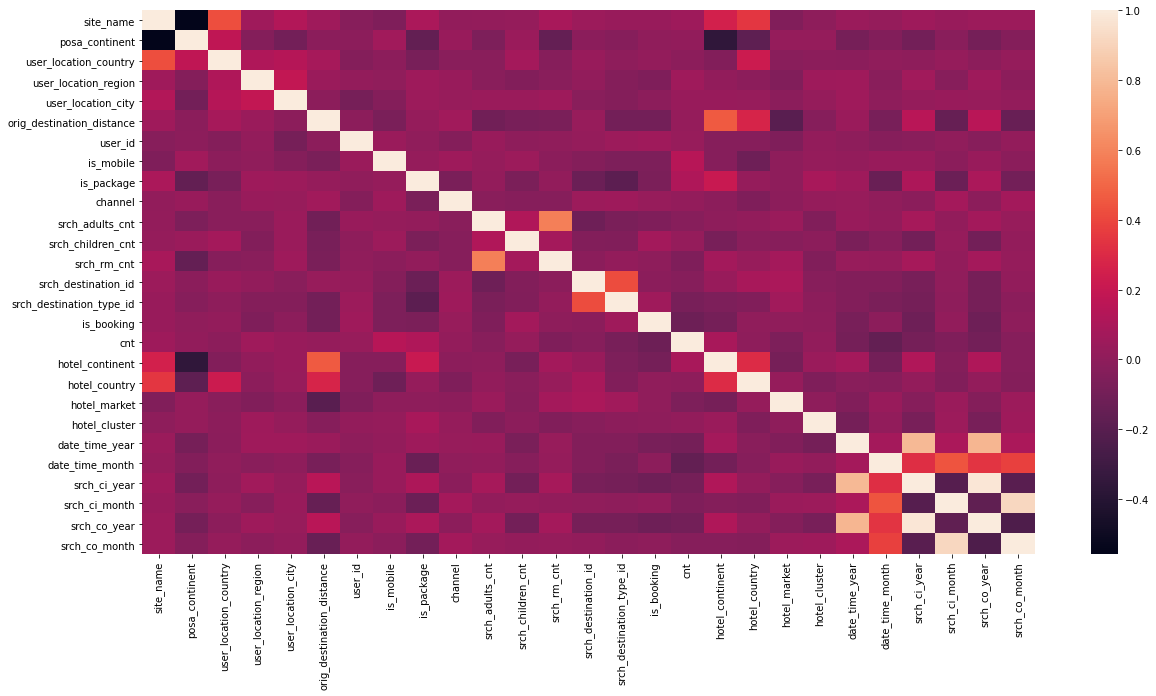

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(train.corr())
##Correlation heat map

In [24]:
train.corr()["hotel_cluster"].sort_values()
##Sorted correlation values in comparison to hotel cluster

date_time_year              -0.091839
srch_ci_year                -0.082198
srch_co_year                -0.080500
hotel_country               -0.056714
srch_rm_cnt                 -0.049394
srch_adults_cnt             -0.046789
orig_destination_distance   -0.029632
srch_destination_id         -0.025882
user_location_country       -0.008373
srch_children_cnt           -0.006115
srch_destination_type_id    -0.004883
hotel_market                -0.003073
is_booking                  -0.001563
site_name                    0.000731
cnt                          0.010512
date_time_month              0.014342
user_id                      0.015190
posa_continent               0.021725
is_mobile                    0.022681
channel                      0.023892
user_location_city           0.024813
hotel_continent              0.040043
srch_ci_month                0.050803
srch_co_month                0.054467
user_location_region         0.056181
is_package                   0.091786
hotel_cluste

In [40]:
group = [train.groupby(['srch_destination_id','hotel_country','hotel_market','hotel_cluster'])['is_booking'].agg(['sum','count'])]
a = pd.concat(group).groupby(level=[0,1,2,3]).sum()
a.dropna(inplace=True)

In [41]:
a['sum_and_cnt'] = 0.80*a['sum'] + 0.20*a['count']
a = a.groupby(level=[0,1,2]).apply(lambda i: i.astype(float)/i.sum())
a.reset_index(inplace=True)

In [42]:
pivot = a.pivot_table(index=['srch_destination_id','hotel_country','hotel_market'], columns='hotel_cluster', values='sum_and_cnt').reset_index()
pivot.head(10)
## Creates group by in order to organize, sort, prioritize data to creat pivot table

hotel_cluster,srch_destination_id,hotel_country,hotel_market,2,7,10,15,16,18,19,...,72,77,80,82,85,90,91,95,96,98
0,486,50,726,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3628,50,689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3637,50,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3744,50,1630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3754,50,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3935,50,661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
6,4348,50,1101,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5405,8,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
8,5736,50,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8239,50,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
train = pd.merge(train, destinations, on='srch_destination_id')
train = pd.merge(train, pivot, on=['srch_destination_id','hotel_country','hotel_market'])
train.fillna(0, inplace=True)
##Merge destinations and pivot tables

In [45]:
train = train.loc[train['is_booking'] == 1]
##Only want to include events that are for booking

In [50]:
X = train.drop(['user_id', 'hotel_cluster', 'is_booking'], axis=1)
y = train.hotel_cluster
X.shape, y.shape
##Pulls and creates x and y to be used in models

((54, 390), (54,))

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(multi_class='ovr'))
np.mean(cross_val_score(classifier, X, y))
##Logistic Regression of data

/Users/aarondrexler/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.3327272727272727

In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=5))
np.mean(cross_val_score(classifier, X, y, scoring='accuracy'))
##K-nearest neighbors of data

/Users/aarondrexler/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.14909090909090908